In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results_path = "qualification_results/"

## Load Data

In [3]:
persistence_ssa_results = pd.read_csv(results_path + "rolling_cv_oahu_clean_persistence.csv")
#sarima_ssa_results = pd.read_csv(results_path + "rolling_cv_oahu_residual_sarima.csv")
var_ssa_results = pd.read_csv(results_path + "rolling_cv_oahu_clean_var.csv")
hofts_ssa_results = pd.read_csv(results_path + "rolling_cv_oahu_clean_hofts.csv")
cvfts_ssa_results = pd.read_csv(results_path + "rolling_cv_oahu_clean_cvfts.csv")
cmvfts_ssa_results = pd.read_csv(results_path + "rolling_cv_oahu_clean_cmvfts.csv")
lstm_multi_ssa_results = pd.read_csv(results_path + "rolling_cv_oahu_clean_lstm_multi.csv")
lstm_uni_ssa_results = pd.read_csv(results_path + "rolling_cv_oahu_clean_lstm_uni.csv")
mlp_multi_ssa_results = pd.read_csv(results_path + "rolling_cv_oahu_clean_mlp_multi.csv")
mlp_uni_ssa_results = pd.read_csv(results_path + "rolling_cv_oahu_clean_mlp_uni.csv")

In [4]:
RMSE_real = []
for i in cvfts_ssa_results.RMSE:
    comp = complex(i)
    RMSE_real.append(comp.real)
cvfts_ssa_results['RMSE'] = RMSE_real

In [5]:
U_real = []
for i in cvfts_ssa_results.U:
    comp = complex(i)
    U_real.append(comp.real)
cvfts_ssa_results['U'] = U_real

In [ ]:
##TODO: confirmar porque 5 splits dao erros maiores em SARIMA e CMVFTS
sarima_ssa_results = sarima_ssa_results[sarima_ssa_results.RMSE < 500]
cmvfts_ssa_results = cmvfts_ssa_results[cmvfts_ssa_results.RMSE < 500]

In [6]:
def createBoxplot(filename, data, xticklabels, ylabel):
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(data, patch_artist=True)
    
    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#1b9e77' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
    
    ## Custom x-axis labels
    ax.set_xticklabels(xticklabels)
    ax.set_ylabel(ylabel)
    plt.show()
    fig.savefig(filename, bbox_inches='tight')

## Boxplot OAHU Clean Multivariate

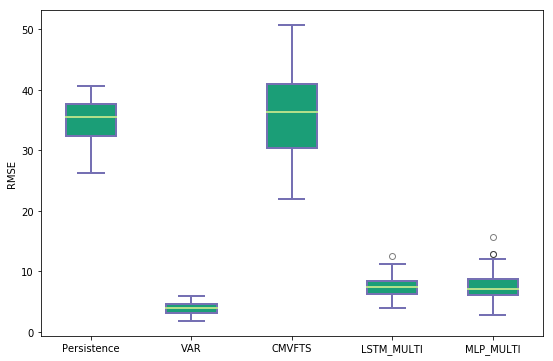

In [7]:
metric = 'RMSE'
multi_data = [persistence_ssa_results[metric], var_ssa_results[metric], cmvfts_ssa_results[metric], lstm_multi_ssa_results[metric], mlp_multi_ssa_results[metric]]
xticks = ['Persistence','VAR','CMVFTS','LSTM_MULTI','MLP_MULTI']

ylab = 'RMSE'
createBoxplot("boxplot_rmse_oahu_clean_multi", multi_data, xticks, ylab)

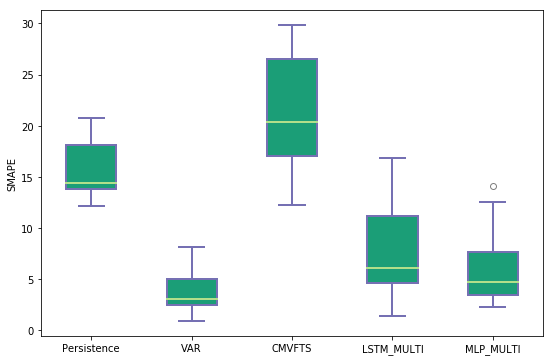

In [8]:
metric = 'SMAPE'
multi_data = [persistence_ssa_results[metric], var_ssa_results[metric], cmvfts_ssa_results[metric], lstm_multi_ssa_results[metric], mlp_multi_ssa_results[metric]]
xticks = ['Persistence','VAR','CMVFTS','LSTM_MULTI','MLP_MULTI']

ylab = 'SMAPE'
createBoxplot("boxplot_smape_oahu_clean_multi", multi_data, xticks, ylab)

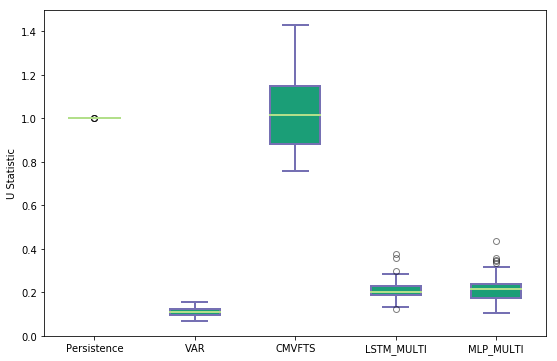

In [9]:
metric = 'U'
multi_data = [persistence_ssa_results[metric], var_ssa_results[metric], cmvfts_ssa_results[metric], lstm_multi_ssa_results[metric], mlp_multi_ssa_results[metric]]
xticks = ['Persistence','VAR','CMVFTS','LSTM_MULTI','MLP_MULTI']

ylab = 'U Statistic'
createBoxplot("boxplot_u_oahu_clean_multi", multi_data, xticks, ylab)

## Improvement table Multivariate

In [10]:
def improvement(metric_model, metric_persistence):
    return (1 - (np.mean(metric_model) / np.mean(metric_persistence)))

In [11]:
index = ['Persistence','VAR','CMVFTS','LSTM_MULTI','MLP_MULTI']
columns = ['imp(RMSE)', 'imp(SMAPE)', 'imp(U)']

In [12]:
imp_df = pd.DataFrame(columns=columns, index=index)

In [13]:
metric = 'RMSE'
imp_prst = improvement(persistence_ssa_results[metric], persistence_ssa_results[metric]) 
imp_var = improvement(var_ssa_results[metric], persistence_ssa_results[metric]) 
imp_cmvfts = improvement(cmvfts_ssa_results[metric], persistence_ssa_results[metric]) 
imp_lstm_multi = improvement(lstm_multi_ssa_results[metric], persistence_ssa_results[metric]) 
imp_mlp_multi = improvement(mlp_multi_ssa_results[metric], persistence_ssa_results[metric]) 

imp_df['imp('+metric+')'] = [imp_prst, imp_var, imp_cmvfts, imp_lstm_multi, imp_mlp_multi]

In [14]:
metric = 'SMAPE'
imp_prst = improvement(persistence_ssa_results[metric], persistence_ssa_results[metric]) 
imp_var = improvement(var_ssa_results[metric], persistence_ssa_results[metric]) 
imp_cmvfts = improvement(cmvfts_ssa_results[metric], persistence_ssa_results[metric]) 
imp_lstm_multi = improvement(lstm_multi_ssa_results[metric], persistence_ssa_results[metric]) 
imp_mlp_multi = improvement(mlp_multi_ssa_results[metric], persistence_ssa_results[metric]) 

imp_df['imp('+metric+')'] = [imp_prst, imp_var, imp_cmvfts, imp_lstm_multi, imp_mlp_multi]

In [15]:
metric = 'U'
imp_prst = improvement(persistence_ssa_results[metric], persistence_ssa_results[metric]) 
imp_var = improvement(var_ssa_results[metric], persistence_ssa_results[metric]) 
imp_cmvfts = improvement(cmvfts_ssa_results[metric], persistence_ssa_results[metric]) 
imp_lstm_multi = improvement(lstm_multi_ssa_results[metric], persistence_ssa_results[metric]) 
imp_mlp_multi = improvement(mlp_multi_ssa_results[metric], persistence_ssa_results[metric]) 

imp_df['imp('+metric+')'] = [imp_prst, imp_var, imp_cmvfts, imp_lstm_multi, imp_mlp_multi]

In [16]:
print(imp_df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  imp(RMSE) &  imp(SMAPE) &    imp(U) \\
\midrule
Persistence &   0.000000 &    0.000000 &  0.000000 \\
VAR         &   0.890043 &    0.764378 &  0.891423 \\
CMVFTS      &  -0.026204 &   -0.357204 & -0.023963 \\
LSTM\_MULTI  &   0.789458 &    0.504985 &  0.789560 \\
MLP\_MULTI   &   0.781368 &    0.627084 &  0.782366 \\
\bottomrule
\end{tabular}



## Boxplot OAHU Residual Univariate

In [17]:
metric = 'RMSE'
#uni_data = [persistence_ssa_results[metric], sarima_ssa_results[metric],  hofts_ssa_results[metric], cvfts_ssa_results[metric], lstm_uni_ssa_results[metric], mlp_uni_ssa_results[metric]]
#xticks = ['Persistence', 'SARIMA', 'HOFTS','CVFTS','LSTM_UNI','MLP_UNI']

uni_data = [persistence_ssa_results[metric],   hofts_ssa_results[metric], cvfts_ssa_results[metric], lstm_uni_ssa_results[metric], mlp_uni_ssa_results[metric]]
xticks = ['Persistence',  'HOFTS','CVFTS','LSTM_UNI','MLP_UNI']

ylab = 'RMSE'
createBoxplot("boxplot_rmse_oahu_residual_uni", uni_data, xticks, ylab)

In [19]:
metric = 'SMAPE'
#uni_data = [persistence_ssa_results[metric], sarima_ssa_results[metric],  hofts_ssa_results[metric], cvfts_ssa_results[metric], lstm_uni_ssa_results[metric], mlp_uni_ssa_results[metric]]
#xticks = ['Persistence', 'SARIMA', 'HOFTS','CVFTS','LSTM_UNI','MLP_UNI']

uni_data = [persistence_ssa_results[metric],   hofts_ssa_results[metric], cvfts_ssa_results[metric], lstm_uni_ssa_results[metric], mlp_uni_ssa_results[metric]]
xticks = ['Persistence',  'HOFTS','CVFTS','LSTM_UNI','MLP_UNI']

ylab = 'SMAPE'
createBoxplot("boxplot_smape_oahu_residual_uni", uni_data, xticks, ylab)

In [20]:
metric = 'U'
#uni_data = [persistence_ssa_results[metric], sarima_ssa_results[metric],  hofts_ssa_results[metric], cvfts_ssa_results[metric], lstm_uni_ssa_results[metric], mlp_uni_ssa_results[metric]]
#xticks = ['Persistence', 'SARIMA', 'HOFTS','CVFTS','LSTM_UNI','MLP_UNI']

uni_data = [persistence_ssa_results[metric],   hofts_ssa_results[metric], cvfts_ssa_results[metric], lstm_uni_ssa_results[metric], mlp_uni_ssa_results[metric]]
xticks = ['Persistence',  'HOFTS','CVFTS','LSTM_UNI','MLP_UNI']

ylab = 'U Statistic'
createBoxplot("boxplot_u_oahu_residual_uni", uni_data, xticks, ylab)

## Improvement Table Univariate

In [ ]:
index = ['Persistence', 'SARIMA', 'HOFTS','CVFTS','LSTM_UNI','MLP_UNI']
columns = ['imp(RMSE)', 'imp(SMAPE)', 'imp(U)']
metrics = ['RMSE', 'SMAPE', 'U']
imp_df = pd.DataFrame(columns=columns, index=index)

In [ ]:
for metric in metrics:
    imp_prst = improvement(persistence_ssa_results[metric], persistence_ssa_results[metric]) 
    imp_sarima = improvement(sarima_ssa_results[metric], persistence_ssa_results[metric]) 
    imp_hofts = improvement(hofts_ssa_results[metric], persistence_ssa_results[metric]) 
    imp_cvfts = improvement(cvfts_ssa_results[metric], persistence_ssa_results[metric]) 
    imp_lstm_uni = improvement(lstm_uni_ssa_results[metric], persistence_ssa_results[metric]) 
    imp_mlp_uni = improvement(mlp_uni_ssa_results[metric], persistence_ssa_results[metric]) 

    imp_df['imp('+metric+')'] = [imp_prst, imp_sarima, imp_hofts, imp_cvfts, imp_lstm_uni, imp_mlp_uni]

In [ ]:
print(imp_df.to_latex())